In [1]:
###################################
## Mine bibliometric info/data from Scopus database using the rScopus package/API
## 
## Apply mining function over list of primary care researchers from Canada, USA, UK, Australia, Asia, etc.
## Curate a database of primary care research articles, and associated meta-data
## The document/journal/author-level meta-data will be used to curate additional scientometric info (doi:Altmetrics, eid:Scopus, au_id=Scopus, issn:SciMago)
## 
## Note: we focus on data from 2017:2022 only (we exclude data published pre-2017; or post-2022; or without publication date)
##
## Author: Chris Meaney
## Date: January 2023
###################################

In [2]:
########################
## Load dependency packages
########################
library(rscopus)

In [3]:
#########################
## Set Scopus API key
#########################
api_key <- set_api_key("Enter_Your_API_Key_Here")

In [4]:
##########################
## Filepaths where data will be imported from, and exported to
##########################

## Set working directory path
wd_path <- "Enter_a_Path_to_a_Working_Directory_For_This_Project"

## Filepath to import the core set of author names, and scopusIDs for researchers in this study
data_path <- paste0(wd_path, "//Final_Combined_ScopusIdsFile.csv")

## Filepath to export the queried Scopus API data; note that meta-data will be used to curate larger scientometric database
scopus_fpath <- paste0(wd_path, "//Core_Scopus_Dataset.csv")
scopus_fpath_sm <- paste0(wd_path, "//Core_Scopus_Dataset_Sm.csv")


In [5]:
##########################
##
## Import the ScopusIDs corresponding to researchers from respective FamMed research programs
##
##########################

## FilePath to directory where each programs ScopusIDs file list is stored
X <- read.csv(data_path, header=TRUE, sep=",")
str(X)

'data.frame':	658 obs. of  6 variables:
 $ FirstName  : chr  "Jonathan" "Stephen" "Robbie" "Christi" ...
 $ LastName   : chr  "Mant" "Sutton" "Duschinsky" "Deaton" ...
 $ ScopusID   : num  2.66e+10 3.52e+10 3.70e+10 5.72e+10 7.01e+09 ...
 $ Country    : chr  "UK" "UK" "UK" "UK" ...
 $ Institution: chr  "Cambridge" "Cambridge" "Cambridge" "Cambridge" ...
 $ AuthorName : chr  "JonathanMant" "StephenSutton" "RobbieDuschinsky" "ChristiDeaton" ...


In [6]:
##########################
##
## Some basic descriptive stats on the dataset/sample
##
##########################

In [7]:
## How many unique institutions
length(unique(X$Institution))

[1] 17

In [8]:
## How many people from each institutional website/page were abstracted
table(X$Institution, useNA="always")


Cambridge Dartmouth      Duke   Harvard       HKU     Laval    McGill  Michigan 
        9        77        13        29        11        37        32        28 
   Monash      OHSU    Ottawa    Oxford   Toronto       UBC       UCL      UCSF 
       16        19        21       177        75        39        53        14 
     UNSW      <NA> 
        8         0 

In [9]:
## Institution by country cross-tab
table(X$Institution, X$Country, useNA="always")

           
            Asia AUS Canada  UK USA <NA>
  Cambridge    0   0      0   9   0    0
  Dartmouth    0   0      0   0  77    0
  Duke         0   0      0   0  13    0
  Harvard      0   0      0   0  29    0
  HKU         11   0      0   0   0    0
  Laval        0   0     37   0   0    0
  McGill       0   0     32   0   0    0
  Michigan     0   0      0   0  28    0
  Monash       0  16      0   0   0    0
  OHSU         0   0      0   0  19    0
  Ottawa       0   0     21   0   0    0
  Oxford       0   0      0 177   0    0
  Toronto      0   0     75   0   0    0
  UBC          0   0     39   0   0    0
  UCL          0   0      0  53   0    0
  UCSF         0   0      0   0  14    0
  UNSW         0   8      0   0   0    0
  <NA>         0   0      0   0   0    0

In [10]:
## How many people from each country
table(X$Country, useNA="always")


  Asia    AUS Canada     UK    USA   <NA> 
    11     24    204    239    180      0 

In [11]:
## How many people have ScopusIDs
table(is.na(X$ScopusID))


FALSE 
  658 

In [12]:
## How many duplicate ScopusIDs
X_sm <- X[is.na(X$ScopusID)==FALSE, ]

list(
    dim(X),
    dim(X_sm)
    )

[[1]]
[1] 658   6

[[2]]
[1] 658   6

In [13]:
## Remaining duplicate ScopusIDs
dup_scopus_ids <- X_sm$ScopusID[duplicated(X_sm$ScopusID)]
X_sm[X_sm$ScopusID %in% dup_scopus_ids, ]

FirstName,LastName,ScopusID,Country,Institution,AuthorName
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>


In [14]:
## Investigate uniqueness of ScopusIDs
list(
    dim(X_sm),
    length(unique(X_sm$ScopusID))
    )

[[1]]
[1] 658   6

[[2]]
[1] 658

In [15]:
## Re-evaluate how many people we were actually able to grab ScopusIDs on from each institution/country
table(X_sm$Institution, useNA="always")


Cambridge Dartmouth      Duke   Harvard       HKU     Laval    McGill  Michigan 
        9        77        13        29        11        37        32        28 
   Monash      OHSU    Ottawa    Oxford   Toronto       UBC       UCL      UCSF 
       16        19        21       177        75        39        53        14 
     UNSW      <NA> 
        8         0 

In [16]:
table(X_sm$Country, useNA="always")


  Asia    AUS Canada     UK    USA   <NA> 
    11     24    204    239    180      0 

In [17]:
table(X_sm$Institution, X_sm$Country, useNA="always")

           
            Asia AUS Canada  UK USA <NA>
  Cambridge    0   0      0   9   0    0
  Dartmouth    0   0      0   0  77    0
  Duke         0   0      0   0  13    0
  Harvard      0   0      0   0  29    0
  HKU         11   0      0   0   0    0
  Laval        0   0     37   0   0    0
  McGill       0   0     32   0   0    0
  Michigan     0   0      0   0  28    0
  Monash       0  16      0   0   0    0
  OHSU         0   0      0   0  19    0
  Ottawa       0   0     21   0   0    0
  Oxford       0   0      0 177   0    0
  Toronto      0   0     75   0   0    0
  UBC          0   0     39   0   0    0
  UCL          0   0      0  53   0    0
  UCSF         0   0      0   0  14    0
  UNSW         0   8      0   0   0    0
  <NA>         0   0      0   0   0    0

In [18]:
#####################################################
##
##
## Query Article Information by Scopus Author ID
##
##
#####################################################

In [19]:
#############################
## User Defined Function - to Grab Scopus Author Data
#############################
get_au_df <- function(id) {
    out <- tryCatch(
        {
        ## Grab data for given author ID
        dat <- author_df(au_id=id, api_key=api_key, verbose=FALSE)
        ## For each author dataframe grab relevant info
        prism_url <- dat[["prism:url"]]
        eid <- dat[["eid"]]
        doi <- dat[["prism:doi"]]
        issn <- dat[["prism:issn"]]
        eissn <- dat[["prism:eIssn"]]  
        pub_title <- dat[["dc:title"]]
        pub_author <- dat[["dc:creator"]]
        pub_journal <- dat[["prism:publicationName"]]
        pub_date <- dat[["prism:coverDate"]]
        pub_abstract <- dat[["dc:description"]]
        pub_keywords <- dat[["authkeywords"]]
        pub_type <- dat[["prism:aggregationType"]] 
        pub_subtype <- dat[["subtypeDescription"]] 
        open_access <- dat[["openaccessFlag"]]
        fund_acr <- dat[["fund-acr"]]
        fund_num <- dat[["fund-no"]]
        fund_sponsor <- dat[["fund-sponsor"]] 
        cited_count <- dat[["citedby-count"]]
        au_id <- dat[["au_id"]]
        ## Put together into small author dataframe
        dat_sm <- data.frame(prism_url=prism_url,
                        eid=eid,
                        doi=doi,
                        issn=issn,
                        eissn=eissn,
                        pub_title=pub_title,
                        pub_author=pub_author,
                        pub_journal=pub_journal,
                        pub_date=pub_date,
                        pub_abstract=pub_abstract,
                        pub_keywords=pub_keywords,
                        pub_type=pub_type,
                        pub_subtype=pub_subtype,
                        open_access=open_access,
                        fund_acr=fund_acr,
                        fund_num=fund_num,
                        fund_sponsor=fund_sponsor,
                        cited_count=cited_count,
                        au_id=au_id)
        },
        error=function(cond) {
            # Choose a return value in case of error
            return(data.frame(prism_url=NA,
                        eid=NA,
                        doi=NA,
                        issn=NA,
                        eissn=NA,
                        pub_title=NA,
                        pub_author=NA,
                        pub_journal=NA,
                        pub_date=NA,
                        pub_abstract=NA,
                        pub_keywords=NA,
                        pub_type=NA,
                        pub_subtype=NA,
                        open_access=NA,
                        fund_acr=NA,
                        fund_num=NA,
                        fund_sponsor=NA,
                        cited_count=NA,
                        au_id=id))
        },
        warning=function(cond) {
            # Choose a return value in case of warning
            return(data.frame(prism_url=NA,
                        eid=NA,
                        doi=NA,
                        issn=NA,
                        eissn=NA,
                        pub_title=NA,
                        pub_author=NA,
                        pub_journal=NA,
                        pub_date=NA,
                        pub_abstract=NA,
                        pub_keywords=NA,
                        pub_type=NA,
                        pub_subtype=NA,
                        open_access=NA,
                        fund_acr=NA,
                        fund_num=NA,
                        fund_sponsor=NA,
                        cited_count=NA,
                        au_id=id))
        },
        finally={
            # Choose a return value in case of warning
        }
    )    
    return(out)
}

In [20]:
##
## Instantiate empty list
##
scopus_df_list <- list()

##
## Loop over list grabbing data
##
t0 <- Sys.time()

for (i in 1:nrow(X_sm)) {
	## Grab Name and ID
	nam <- X_sm$AuthorName[i]
	id <- X_sm$ScopusID[i]
	cat(i, "\tQuerying Scopus ID: ", id, "\t Author Name:", nam, "\n")
	## Add to list
	dat_sm <- get_au_df(id=id)
	dat_sm$nam <- nam
	dat_sm$id <- id
	scopus_df_list[[i]] <- dat_sm 
	## Pause for a second as to not kill API
	Sys.sleep(runif(n=1, min=0, max=3))
}

t1 <- Sys.time()
t1-t0

1 	Querying Scopus ID:  26643244100 	 Author Name: JonathanMant 
2 	Querying Scopus ID:  35235628600 	 Author Name: StephenSutton 
3 	Querying Scopus ID:  36986651700 	 Author Name: RobbieDuschinsky 
4 	Querying Scopus ID:  57204081024 	 Author Name: ChristiDeaton 
5 	Querying Scopus ID:  7005525927 	 Author Name: StephenBarclay 
6 	Querying Scopus ID:  7006758192 	 Author Name: TheresaMarteau 
7 	Querying Scopus ID:  7103067740 	 Author Name: FionaWalter 
8 	Querying Scopus ID:  7201880869 	 Author Name: SimonGriffin 
9 	Querying Scopus ID:  8455034600 	 Author Name: JulietUsherSmith 
10 	Querying Scopus ID:  17934532500 	 Author Name: RobertGreenberg 
11 	Querying Scopus ID:  19433645800 	 Author Name: AllenJDietrich 
12 	Querying Scopus ID:  26642948500 	 Author Name: JohnABaron 
13 	Querying Scopus ID:  34873010500 	 Author Name: CathleenEMorrow 
14 	Querying Scopus ID:  35485120300 	 Author Name: ReneeLPepin 
15 	Querying Scopus ID:  35501693400 	 Author Name: JohnEWennberg 
16 	Q

Time difference of 58.95211 mins

In [21]:
## 
## Post Process the Data
##
scopus_df <- do.call("rbind", scopus_df_list)
str(scopus_df)

'data.frame':	56552 obs. of  21 variables:
 $ prism_url   : chr  "https://api.elsevier.com/content/abstract/scopus_id/85132637782" "https://api.elsevier.com/content/abstract/scopus_id/85141982189" "https://api.elsevier.com/content/abstract/scopus_id/85139375391" "https://api.elsevier.com/content/abstract/scopus_id/85139143469" ...
 $ eid         : chr  "2-s2.0-85132637782" "2-s2.0-85141982189" "2-s2.0-85139375391" "2-s2.0-85139143469" ...
 $ doi         : chr  "10.1038/s41467-022-31010-2" "10.1136/bmjopen-2022-062700" "10.1093/fampra/cmab184" "10.1136/bmjopen-2022-065066" ...
 $ issn        : chr  NA NA NA NA ...
 $ eissn       : chr  "20411723" "20446055" "14602229" "20446055" ...
 $ pub_title   : chr  "Author Correction: Somatic mosaicism and common genetic variation contribute to the risk of very-early-onset in"| __truncated__ "Patients' experience of and participation in a stroke self-management programme, My Life After Stroke (MLAS): a"| __truncated__ "Feasibility of the cardiac o

In [22]:
##
## Postprocess the Scopus Article-by-Author Data.Frame
##
scopus_df$pub_date <- as.Date(scopus_df$pub_date)
scopus_df$pub_year <- as.numeric(substr(scopus_df$pub_date, start=1, stop=4))
scopus_df$cited_count <- as.numeric(scopus_df$cited_count)
str(scopus_df)

'data.frame':	56552 obs. of  22 variables:
 $ prism_url   : chr  "https://api.elsevier.com/content/abstract/scopus_id/85132637782" "https://api.elsevier.com/content/abstract/scopus_id/85141982189" "https://api.elsevier.com/content/abstract/scopus_id/85139375391" "https://api.elsevier.com/content/abstract/scopus_id/85139143469" ...
 $ eid         : chr  "2-s2.0-85132637782" "2-s2.0-85141982189" "2-s2.0-85139375391" "2-s2.0-85139143469" ...
 $ doi         : chr  "10.1038/s41467-022-31010-2" "10.1136/bmjopen-2022-062700" "10.1093/fampra/cmab184" "10.1136/bmjopen-2022-065066" ...
 $ issn        : chr  NA NA NA NA ...
 $ eissn       : chr  "20411723" "20446055" "14602229" "20446055" ...
 $ pub_title   : chr  "Author Correction: Somatic mosaicism and common genetic variation contribute to the risk of very-early-onset in"| __truncated__ "Patients' experience of and participation in a stroke self-management programme, My Life After Stroke (MLAS): a"| __truncated__ "Feasibility of the cardiac o

In [23]:
##
## Merge in the original author meta data
##
X_sm_ <- X_sm[,c("ScopusID","Country","Institution","AuthorName")]
names(X_sm_) <- c("au_id","au_country","au_institution","au_name")

list(
    dim(X_sm_),
    length(unique(X_sm_$au_id))
    )

[[1]]
[1] 658   4

[[2]]
[1] 658

In [24]:
list(
    length(unique(scopus_df$au_id)),
    dim(scopus_df)
    )

[[1]]
[1] 658

[[2]]
[1] 56552    22

In [25]:
scopus_df <- merge(x=scopus_df, y=X_sm_, by="au_id", all.x=TRUE)
str(scopus_df)

'data.frame':	56552 obs. of  25 variables:
 $ au_id         : chr  "10041373600" "10041373600" "10041373600" "10041373600" ...
 $ prism_url     : chr  "https://api.elsevier.com/content/abstract/scopus_id/85140976962" "https://api.elsevier.com/content/abstract/scopus_id/85121747496" "https://api.elsevier.com/content/abstract/scopus_id/85112107056" "https://api.elsevier.com/content/abstract/scopus_id/85118672412" ...
 $ eid           : chr  "2-s2.0-85140976962" "2-s2.0-85121747496" "2-s2.0-85112107056" "2-s2.0-85118672412" ...
 $ doi           : chr  "10.1016/j.socscimed.2022.115463" "10.1111/add.15760" "10.1016/j.socscimed.2021.114262" "10.3399/BJGP.2021.0195" ...
 $ issn          : chr  "02779536" "09652140" "02779536" "09601643" ...
 $ eissn         : chr  "18735347" "13600443" "18735347" "14785242" ...
 $ pub_title     : chr  "Brief opportunistic interventions by general practitioners to promote smoking cessation: A conversation analytic study" "The old and familiar meets the new and

In [26]:
## Subset to include only publications over study timeframe
scopus_df_sm <- scopus_df[scopus_df$pub_year %in% 2017:2022, ]
dim(scopus_df_sm)

[1] 22124    25

In [27]:
## Subset to include only publications that are journal articles/reviews
scopus_df_sm <- scopus_df_sm[scopus_df_sm$pub_type=="Journal" & scopus_df_sm$pub_subtype %in% c("Review", "Article"), ]
dim(scopus_df_sm)

[1] 19259    25

In [28]:
## Subset to include only articles with valid publication title
scopus_df_sm <- scopus_df_sm[is.na(scopus_df_sm$pub_title)==FALSE & scopus_df_sm$pub_title!="", ]
dim(scopus_df_sm)

[1] 19259    25

In [29]:
## Subset to include only articles with a valid DOI (this will be used to grab the Altmetrics data)
scopus_df_sm <- scopus_df_sm[is.na(scopus_df_sm$doi)==FALSE, ]
dim(scopus_df_sm)

[1] 18874    25

In [30]:
## Subset to include only articles with a valid EID (this will be used to grab the Co-author collaboration data)
scopus_df_sm <- scopus_df_sm[is.na(scopus_df_sm$eid)==FALSE, ]
dim(scopus_df_sm)

[1] 18874    25

In [31]:
## Publications by year --- after removing invalid articles
table(scopus_df_sm$pub_year)


2017 2018 2019 2020 2021 2022 
2591 2811 2823 3075 3617 3957 

In [32]:
## Number unique authors publishing an article/review during our study timeframe (2017:2022)
list(
length(unique(scopus_df_sm$au_id)),
length(unique(scopus_df_sm$doi)),
length(unique(scopus_df_sm$eid)),
length(unique(scopus_df_sm$pub_title))
)

[[1]]
[1] 591

[[2]]
[1] 13093

[[3]]
[1] 13098

[[4]]
[1] 13047

In [33]:
##########
## Write to disk --- only keep the small dataset, containing primary care studies published from 2017:2022
#########
write.csv(x=scopus_df, file=scopus_fpath, row.names=FALSE)
write.csv(x=scopus_df_sm, file=scopus_fpath_sm, row.names=FALSE)

In [34]:
############################
##
## Some basic summary measures --- on core dataset (not the smaller dataset focusing on incl/excl criteria)
##
############################

In [35]:
###########
## Unique publications
###########
scopus_df_uniq <- scopus_df[!duplicated(scopus_df$eid), ]

list(
    dim(scopus_df),
    dim(scopus_df_uniq)
    )

[[1]]
[1] 56552    25

[[2]]
[1] 45276    25

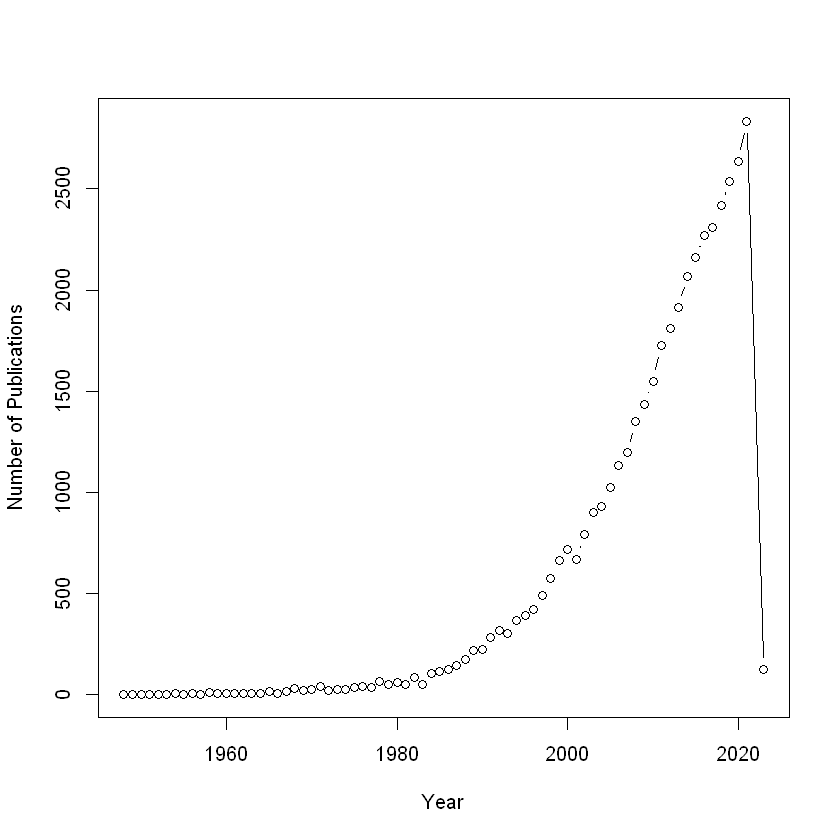

In [36]:
##########
## Publication year
##########
scopus_df_pub_year <- data.frame(table(scopus_df_uniq$pub_year))
names(scopus_df_pub_year) <- c("pub_year","freq")
scopus_df_pub_year$pub_year <- as.numeric(as.character(scopus_df_pub_year$pub_year))
plot(x=scopus_df_pub_year$pub_year[scopus_df_pub_year$pub_year!=2022],
        y=scopus_df_pub_year$freq[scopus_df_pub_year$pub_year!=2022], 
        type="b",
        col="black",
        ylab="Number of Publications",
        xlab="Year",
        )


In [37]:
#########
## Publication Journals
##########
scopus_df_pub_journal <- data.frame(table(scopus_df_uniq$pub_journal))
names(scopus_df_pub_journal) <- c("pub_journal","freq")
scopus_df_pub_journal$pub_journal <- as.character(scopus_df_pub_journal$pub_journal)
scopus_df_pub_journal <- with(scopus_df_pub_journal, scopus_df_pub_journal[order(-freq), ])
head(scopus_df_pub_journal, 50)

,pub_journal,freq
,<chr>,<int>
901,Canadian Family Physician,972
766,BMJ Open,947
836,British Journal of General Practice,722
4185,PLoS ONE,636
874,British Medical Journal,503
754,BMJ,502
756,BMJ (Online),454
4886,The BMJ,349
746,BMC Public Health,331


In [38]:
##########
## First Authored Publications
###########
scopus_df_pub_author <- data.frame(table(scopus_df_uniq$pub_author))
names(scopus_df_pub_author) <- c("pub_author","freq")
scopus_df_pub_author$pub_author <- as.character(scopus_df_pub_author$pub_author)
scopus_df_pub_author <- with(scopus_df_pub_author, scopus_df_pub_author[order(-freq), ])
head(scopus_df_pub_author, 50)

,pub_author,freq
,<chr>,<int>
6282,Greenhalgh T.,390
9643,Lexchin J.,246
662,Aronson J.K.,245
14251,Salisbury H.,187
660,Aronson J.,178
1561,Bhui K.,168
7640,Iliffe S.,160
12981,Pimlott N.,141
3963,De Lusignan S.,123


In [39]:
###########
## Earliest publications
###########
scopus_df_early_pubs <- scopus_df[(scopus_df$pub_year < 1990) & (is.na(scopus_df$pub_year)==FALSE), ]
scopus_df_early_pubs <- with(scopus_df_early_pubs, scopus_df_early_pubs[order(pub_year), ])
scopus_df_early_pubs[,c("pub_author","nam","pub_date","pub_journal","pub_title")]

,pub_author,nam,pub_date,pub_journal,pub_title
,<chr>,<chr>,<date>,<chr>,<chr>
22341,Irving H.,RobertWilliams,1948-01-01,Nature,Order of stability of metal complexes
22339,Irving H.,RobertWilliams,1949-01-01,Journal of the Chemical Society (Resumed),Metal complexes and partition equilibria
22340,Irving H.,RobertWilliams,1949-01-01,Journal of the Chemical Society (Resumed),Studies with dithizone. Part II. Dithizone as a monobasic acid
22338,Irving H.,RobertWilliams,1950-01-01,Journal of the Chemical Society (Resumed),The effect of time and temperature on potentials measured with the glass electrode
46527,Grzybowski S.,StefanGrzybowski,1951-12-15,The Lancet,TUBERCULIN JELLY TEST
22334,Williams R.J.P.,RobertWilliams,1952-12-01,The Analyst,Gradient elution analysis
22335,Williams R.,RobertWilliams,1952-12-01,Journal of the Chemical Society (Resumed),The stability of the complexes of the group IIA metal ions
22336,Irving H.M.,RobertWilliams,1952-12-01,The Analyst,Section 6: Organic complexes Some factors controlling the selectivity of organic reagents
22337,Irving H.,RobertWilliams,1952-01-01,Journal of the Chemical Society (Resumed),Studies with dithizone. Part III. The extraction constant of zinc dithizonate


In [40]:
###########
## Keywords of publications
###########
table(is.na(scopus_df_uniq$pub_keywords))
scopus_list_keywords <- lapply(scopus_df_uniq$pub_keywords, function(x) strsplit(x, split=" \\| "))
scopus_df_keywords <- data.frame(table(tolower(unlist(scopus_list_keywords))))
names(scopus_df_keywords) <- c("keyword","freq")
scopus_df_keywords <- with(scopus_df_keywords, scopus_df_keywords[order(-freq), ])
head(scopus_df_keywords, 100)


FALSE  TRUE 
21999 23277 

,keyword,freq
,<fct>,<int>
24788,primary care,1618
24871,primary health care,716
25839,qualitative research,559
12136,general practice,516
10200,epidemiology,499
30546,systematic review,457
7001,covid-19,449
7908,depression,434
23402,physical activity,433


In [41]:
#############
## What types of publicatons are being generated
#############
with(scopus_df, table(pub_subtype, pub_type))

                  pub_type
pub_subtype         Book Book Series Conference Proceeding Journal
  Article              4         120                     4   41483
  Book                47           0                     0       0
  Book Chapter       591          83                     0       1
  Conference Paper     0         172                   219     597
  Data Paper           0           0                     0       4
  Editorial           22           6                     1    1642
  Erratum              0           0                     0     466
  Letter               0           0                     0    2506
  Note                 1           2                     0    2100
  Retracted            0           0                     0       2
  Review               0          17                     0    5795
  Short Survey         0           1                     0     556
                  pub_type
pub_subtype        Trade Journal
  Article                      9
  Book   

In [42]:
###########
## Open access
###########
with(scopus_df, table(open_access))

open_access
FALSE  TRUE 
30939 25572 

In [43]:
#############
## Funder
#############
with(scopus_df, table(fund_acr))

fund_acr
<U+7814><U+7A76><U+8CC7><U+52A9><U+5C40>                                     AA 
                                    23                                      8 
                                 AAAPC                                 AADPRT 
                                     3                                      2 
                                   AAG                                    AAL 
                                     4                                      2 
                                  AAMC                                   AAOS 
                                     1                                      3 
                                 AASLD                                    AAU 
                                     3                                      4 
                                   ABA                                 ABFM-F 
                                     4                                      1 
                                  ABPN   

In [44]:
################
## Session Information
################

In [45]:
Sys.Date()

[1] "2023-01-18"

In [46]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 17763)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] rscopus_0.7.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.8.3     magrittr_2.0.3   tidyselect_1.1.2 uuid_1.1-0      
 [5] R6_2.5.1         rlang_1.0.2      fastmap_1.1.0    fansi_1.0.3     
 [9] plyr_1.8.7       httr_1.4.4       dplyr_1.0.9      tools_4.1.3     
[13] utf8_1.2.2       cli_3.3.0        htmltools_0.5.2  ellipsis_0.3.2  
[17] digest_0.6.29    tibble_3.1.7     lifecycle_1.0.1  crayon_1.5.1    
[21] IRdisplay_1.1    tidyr_1.2.0      purrr_0.3.4      repr_1.1.4      
[25] base6

In [47]:
version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 